In [77]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [95]:
data = pd.read_csv('EEGID Record 2018-06-03_15_29_46_729 Kevin sleep.csv')

In [96]:
#dropping unnecessary columns
data = data.drop(['poorSignal', 'blinkStrength', 'tagEvent', 'location'], axis = 1)

#Shifting timestamp
temp = data['timestampMs'][0]
for i in range(len(data)):
    data.at[i, 'timestampMs'] -= temp #Remember this functionality of dataframe


#Cutting of starting and ending datapoints    
#Assumption : Data collected at regular interval
start_time = 13*60*(1000/100) # ex: 13 minutes
end_time = 77*60*(1000/100)
data = data.loc[start_time:end_time]

#Resetting the dataframe indexing
data.index = range(len(data))


#Shifting timestamp again
temp = data['timestampMs'][0]
for i in range(len(data)):
    data.at[i, 'timestampMs'] -= temp #Remember this functionality of dataframe

data.head()

,timestampMs,eegRawValue,eegRawValueVolts,attention,meditation,delta,theta,alphaLow,alphaHigh,betaLow,betaHigh,gammaLow,gammaMid
0,0,53,1.164551e-05,69,69,16753540,11392,25601,8977,4441,4808,3250,1234
1,113,28,6.152344e-06,69,69,16753540,11392,25601,8977,4441,4808,3250,1234
2,213,54,1.186523e-05,69,69,16753540,11392,25601,8977,4441,4808,3250,1234
3,314,2,4.394531e-07,69,69,16753540,11392,25601,8977,4441,4808,3250,1234
4,414,68,1.494141e-05,69,69,16753540,11392,25601,8977,4441,4808,3250,1234


In [97]:
#labelling the data
y = np.zeros(len(data), dtype = int)
start_activity = int(22*60*(1000/100))
end_activity = int(47*60*(1000/100))
y[start_activity:end_activity] = 1
y = pd.Series(y)

# Correlation of features with labels

In [110]:
list_ = list()
for ele in data.columns:
    cor = data[ele].corr(y)
    list_.append([cor, ele])
list_.sort(reverse = True)
for ele in list_:
    print('Correlation with ', ele[1], ' = ', ele[0])

Correlation with  timestampMs  =  0.10753335953232146
Correlation with  eegRawValue  =  0.04364163696899584
Correlation with  eegRawValueVolts  =  0.043641636968995826
Correlation with  gammaLow  =  0.03418613078241084
Correlation with  gammaMid  =  0.008420350394280799
Correlation with  meditation  =  0.007608264350094387
Correlation with  betaLow  =  0.00038368478516205795
Correlation with  theta  =  -0.0073903693971127124
Correlation with  betaHigh  =  -0.020017305256948188
Correlation with  delta  =  -0.03881565023853908
Correlation with  alphaHigh  =  -0.06320130994576158
Correlation with  alphaLow  =  -0.10069031061738501
Correlation with  attention  =  -0.1675903183972912


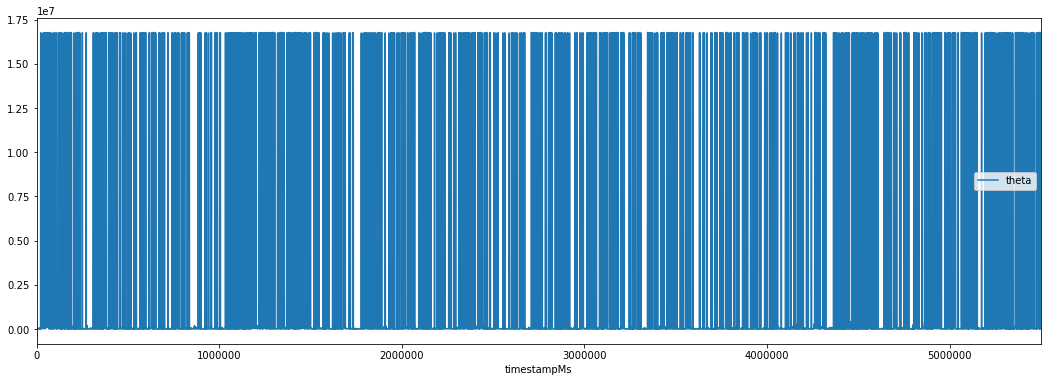

In [53]:
data.plot('timestampMs', 'theta' ,figsize = (18, 6))
plt.show()